<a href="https://colab.research.google.com/github/pedroohsilva/previsao-emissao-co2-veiculos-canada-2025/blob/main/previsao_emissao_co2_veiculos_canada_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Emissões de CO₂ em Veículos no Canadá 2025
Neste projeto, utilizo um modelo de **Regressão Linear** para estimar as emissões de dióxido de carbono (CO₂) de veículos canadenses com base em suas características técnicas com dados reais.

### Objetivos:

- Fornecer insights úteis para análises ambientais
- Usar o Scikit-learn para implementar uma regressão linear múltipla
- Criar, testar e implementar um modelo de regressão linear com dados reais

**Fonte:** https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

---
### Entendendo os Dados:
​O conjunto de dados "Classificações de Consumo de Combustível de 2025" fornece informações detalhadas sobre o consumo de combustível de veículos no Canadá para o ano-modelo 2025. Os dados foram atualizados pela última vez em 25 de março de 2025 e estão disponíveis no Portal de Dados Abertos do Canadá.

| Coluna                                      | Descrição                                                                                              |
|---------------------------------------------|--------------------------------------------------------------------------------------------------------|
| **Ano do Modelo** *(Model year)*            | Ano de fabricação do veículo.                                                                          |
| **Marca** *(Make)*                          | Fabricante do veículo.                                                                                 |
| **Modelo** *(Model)*                        | Nome específico do modelo do veículo.                                                                  |
| **Classe do Veículo** *(Vehicle class)*     | Categoria à qual o veículo pertence, como compacto, SUV, etc.                                          |
| **Tamanho do Motor** *(Engine size (L))*    | Capacidade volumétrica do motor em litros.                                                             |
| **Número de Cilindros** *(Cylinders)*       | Quantidade de cilindros no motor.                                                                      |
| **Transmissão** *(Transmission)*            | Tipo de transmissão do veículo (por exemplo, automática ou manual).                                    |
| **Tipo de Combustível** *(Fuel type)*       | Tipo de combustível utilizado pelo veículo (por exemplo, gasolina, diesel).                            |
| **Consumo na Cidade** *(City (L/100 km))*   | Consumo de combustível em ambiente urbano, medido em litros por 100 quilômetros.                       |
| **Consumo na Estrada** *(Highway (L/100 km))* | Consumo de combustível em rodovias, medido em litros por 100 quilômetros.                              |
| **Consumo Combinado** *(Combined (L/100 km))* | Média ponderada do consumo de combustível na cidade e na estrada, em litros por 100 quilômetros.       |
| **Consumo Combinado em MPG** *(Combined (mpg))* | Consumo combinado convertido para milhas por galão.                                                    |
| **Emissões de CO₂** *(CO2 emissions (g/km))*| Quantidade de dióxido de carbono emitida pelo veículo, medida em gramas por quilômetro.                |
| **Classificação de CO₂** *(CO2 rating)*     | Avaliação da eficiência do veículo em termos de emissões de CO₂.                                       |
| **Classificação de Poluentes** *(Smog rating)*| Avaliação do impacto do veículo na formação de smog.                                                   |

Essas informações são essenciais para consumidores, pesquisadores e formuladores de políticas que buscam compreender e comparar a eficiência energética e o impacto ambiental dos veículos disponíveis no mercado canadense.

### Importação de Pacotes:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importação de Dados:

In [5]:
df = pd.read_csv("/content/FuelConsumptionCo2.csv", encoding="latin1")
# Utilizei o parâmetro 'encoding para o Pandas conseguir decodificar corretamente os caracteres especiais presentes no arquivo CSV.

### Explorando os Dados:

In [6]:
# Forma dos dados
print(f"O conjunto de dados possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O conjunto de dados possui 648 linhas e 15 colunas.


In [7]:
# Cabeçalho
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2025,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,6
1,2025,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,5
2,2025,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,5
3,2025,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,4
4,2025,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,4


In [8]:
# Estatísticas gerais
df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,648.0,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,2025.0,2.959877,5.350309,11.995525,9.184722,10.732716,28.222222,251.671296,4.638889,4.936728
std,0.0,1.199431,1.813346,3.382516,2.178715,2.783076,8.081501,64.676307,1.328268,1.329958
min,2025.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2025.0,2.000000,4.000000,9.700000,7.600000,8.800000,23.000000,206.000000,4.000000,4.000000
50%,2025.0,2.500000,4.000000,11.900000,9.000000,10.600000,27.000000,250.000000,5.000000,5.000000
75%,2025.0,3.500000,6.000000,14.025000,10.500000,12.500000,32.000000,293.000000,5.000000,6.000000
max,2025.0,8.000000,16.000000,29.700000,19.200000,25.000000,64.000000,586.000000,8.000000,7.000000


In [9]:
# Verificando número de modelos de veículos
models = np.unique(df['Model'])
num_models = models.size
print(f"O conjunto de dados possui {num_models} modelos de veículos.")

O conjunto de dados possui 549 modelos de veículos.


In [10]:
# Verificando os anos dos veículos do dataset
years = np.unique(df['Model year'])
sum_years = years.size

if sum_years == 1:
  print(f"O conjunto de dados possui veículos apenas de 2025.")
else:
  print(f"O conjunto de dados possui veículos de {sum_years} anos diferentes.")

O conjunto de dados possui veículos apenas de 2025.


In [11]:
# Verificando classes dos veículos
classes_car = np.unique(df['Vehicle class'])
num_classes_car = classes_car.size
print(f"O conjunto de dados possui {num_classes_car} classes de veículos diferentes.\n")
print(f"{classes_car}")

O conjunto de dados possui 13 classes de veículos diferentes.

['Compact' 'Full-size' 'Mid-size' 'Minicompact' 'Minivan'
 'Pickup truck: Small' 'Pickup truck: Standard'
 'Sport utility vehicle: Small' 'Sport utility vehicle: Standard'
 'Station wagon: Mid-size' 'Station wagon: Small' 'Subcompact'
 'Two-seater']


#### Separação das Variáveis de Interesse:

In [12]:
# Separando variáveis importantes para análise
df = df[['Engine size (L)', 'Combined (L/100 km)', 'CO2 emissions (g/km)']]
df.head()

,Engine size (L),Combined (L/100 km),CO2 emissions (g/km)
0,1.5,7.4,172
1,1.5,7.8,181
2,2.0,9.9,230
3,3.5,11.2,263
4,3.0,12.4,291


#### Boxplot - Emissões de CO2

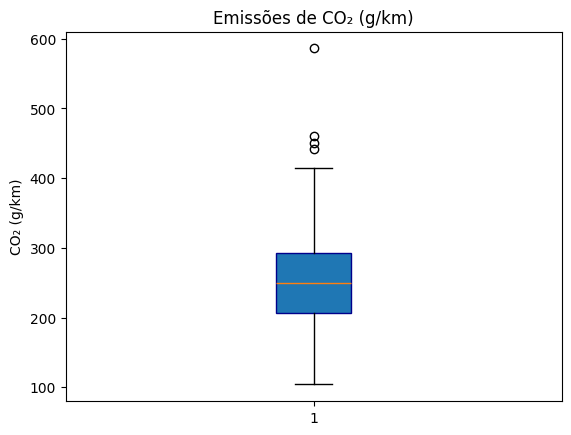

In [13]:
# Gráfico de caixa das emissões de CO2
plt.boxplot(df['CO2 emissions (g/km)'], patch_artist=True, boxprops=dict(color='darkblue'))
plt.title('Emissões de CO₂ (g/km)')
plt.ylabel('CO₂ (g/km)')
plt.show()

#### Histograma - Analisando Distribuição dos Dados

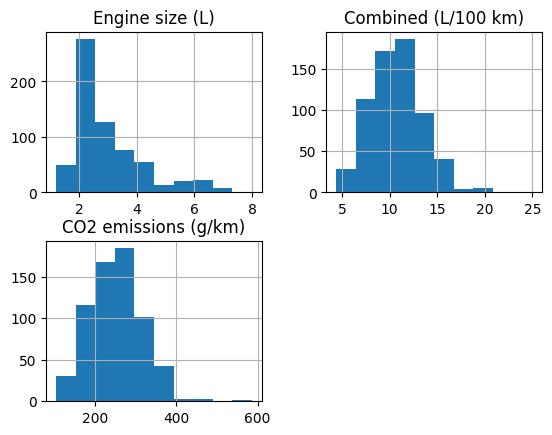

In [14]:
# Analisando distribuição dos dados
viz = df[['Engine size (L)', 'Combined (L/100 km)', 'CO2 emissions (g/km)']]
viz.hist()
plt.show()

- Em geral, os dados seguem uma distribuição normal.

#### Gráficos de Dispersão - Consumo de gasolina X Emissão de CO2

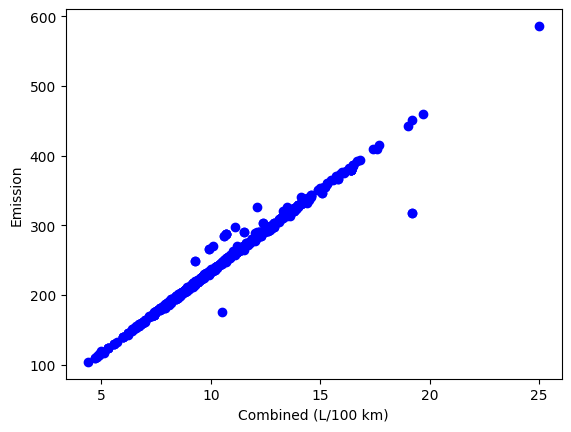

In [15]:
# Relação entre consumo de gasolina X emissão de CO2
plt.scatter(df['Combined (L/100 km)'], df['CO2 emissions (g/km)'], color='blue')
plt.xlabel("Combined (L/100 km)")
plt.ylabel("Emission")
plt.show()

- Analisando o gráfico de dispersão, identificamos que veículos com maior consumo de combustível (L/100 km) tendem a apresentar emissões mais elevadas de CO₂.

#### Gráfico de Dispersão - Capacidade do motor X Emissão de  CO2

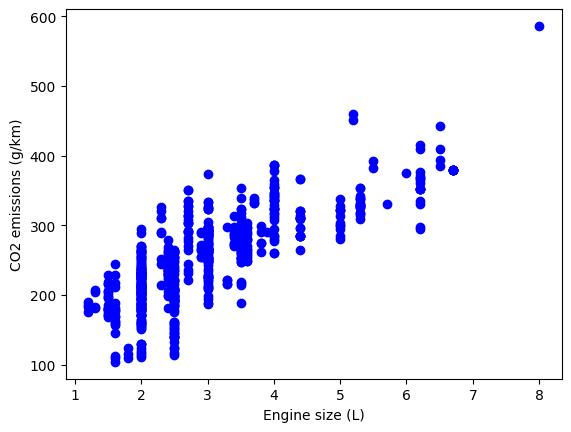

In [16]:
# Relação entre a capacidade do motor X emissão de CO2
plt.scatter(df['Engine size (L)'], df['CO2 emissions (g/km)'], color='blue')
plt.xlabel('Engine size (L)')
plt.ylabel('CO2 emissions (g/km)')
plt.show()

- Veículos com motores maiores tendem a emitir mais CO₂.

#### Qualidade dos Dados:

In [17]:
# Estatísticas Gerais
df.describe()

,Engine size (L),Combined (L/100 km),CO2 emissions (g/km)
count,648.000000,648.000000,648.000000
mean,2.959877,10.732716,251.671296
std,1.199431,2.783076,64.676307
min,1.200000,4.400000,104.000000
25%,2.000000,8.800000,206.000000
50%,2.500000,10.600000,250.000000
75%,3.500000,12.500000,293.000000
max,8.000000,25.000000,586.000000


In [18]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Engine size (L)       648 non-null    float64
 1   Combined (L/100 km)   648 non-null    float64
 2   CO2 emissions (g/km)  648 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.3 KB


In [19]:
# Verificando dados faltantes
df.isnull().count()

,0
Engine size (L),648
Combined (L/100 km),648
CO2 emissions (g/km),648


Realizei uma inspeção rápida e eficiente da qualidade dos dados, economizando tempo e aumentando a assertividade das próximas análises. Tudo pronto para darmos início ao Pré-Processamento de Dados.

### Pré-Processamento de Dados: